In [43]:
from fastai.vision.widgets import *
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [4]:
from fastai.vision.all import *
img = PILImage.create(btn_upload.data[-1])
img

Output hidden; open in https://colab.research.google.com to view.

In [5]:
out_pl = widgets.Output()
#out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [6]:
path = Path("/content/drive/MyDrive/ColabNotebooks/fast.al/HW2")
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'export.pkl')
pred,pred_idx,probs = learn_inf.predict(img)
print(pred,pred_idx,probs)

grizzly bear tensor(1) tensor([8.7057e-02, 9.1292e-01, 2.6547e-05])


In [31]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly bear; Probability: 0.9129')

In [15]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [58]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    print("Prediction Result:", pred, pred_idx, probs)

    if pred and probs is not None:
      lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    else:
      lbl_pred.value = "Prediction failed!"

btn_run.on_click(on_click_classify)

In [46]:
#hide
#Putting back btn_upload to a widget for next cell
#btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

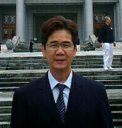

Prediction Result: grizzly bear tensor(1) tensor([0.0355, 0.8153, 0.1492])


In [51]:
print(btn_upload)
btn_run

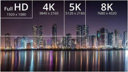

Prediction Result: teddy bear tensor(2) tensor([0.1221, 0.2796, 0.5984])


In [64]:
#hide_output
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])

#print(lbl_pred)

In [65]:
!pip install voila

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 6.5.5 requires jupyter-client<8,>=5.3.4, but you have jupyter-client 8.6.3 which is incompatible.


In [66]:
!jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila 0.5.8 OK
